# Spotify Song Data - Binary Classification

This is a binary classification project that uses a dataset of Spotify song data to determine what features make a song popular on the platform, aka a hit song.

## Introduction

### Imports

In [1]:
# Regulars
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model evaluation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, plot_roc_curve


Bad key "text.kerning_factor" on line 4 in
/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# tqdm
# %%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


0it [00:00, ?it/s]

### Functions

#### Processing Functions

In [3]:
def get_info(df):
    '''Simple function that takes in a full dataframe and returns
    some basic information about the countents of the dataframe.'''
    
    print('Shape of DataFrame:\n', df.shape)
    print('\nDataFrame Info:')
    print(df.info())
    print('\n Null Values Present:\n', df.isna().sum())

#### Plotting Functions

##### Scikit-Learn Evaluations

In [4]:
def evaluate_model(model, X_test, y_test):
    '''Evaluates a scikit-learn classification model and displays a classification report, 
    a confusion matrix, and a ROC-AUC plot.
    
    -----------
    Parameters
    -----------
    model - the model you want to evaluate
    
    X_test - Dataset used in testing the model 
    
    y_test - Label used for predictions and evaluation the model'''
    
    # Predictions
    y_hat_test = model.predict(X_test)
    
    # Classification Report
    print('--------- Classification Report ----------\n')
    print(classification_report(y_test, y_hat_test))
    
    # Confusion Matrix
    fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)
    plot_confusion_matrix(model, X_test, y_test, normalize = 'true',
                          cmap = 'Blues', ax = axes[0])
    
    # ROC-AUC Curve
    roc_auc_plot = plot_roc_curve(model, X_test, y_test, ax = axes[1])
    axes[1].legend()
    axes[1].plot([0,1], [0,1], ls = ':')
    axes[1].grid()
    axes[1].set_title('ROC-AUC Plot')
    fig.tight_layout()
    plt.show()

##### Tensorflow Evaluations

In [5]:
def network_eval_plots(results):
    history = results.history
    
    # Loss
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def nn_confusion_matrix(y_test, preds):
    labels = ['Hit', 'Dud']
    cm = confusion_matrix(y_test, preds, normalize = 'true')
    ax = plt.figure(figsize = (6, 6))
    ax = sns.heatmap(cm, cmap = 'Blues', annot = True, 
                     xticklabels = labels, yticklabels = labels)
    ax.set_ylim([0,2])
    
    
def evaluate_network(results, model, X_test, y_test):
    preds = model.predict(X_test).round()
    print('                 Model Evaluation')
    print('-------------------------------------------------------')
    print(model.evaluate(X_test, y_test))
    print(' ')
    print('                 Loss & Accuracy Curves')
    print('-------------------------------------------------------')
    network_eval_plots(results)
    print(' ')
    print('                 Classification Report')
    print('-------------------------------------------------------')
    print(classification_report(y_test, preds))
    print(' ')    
    print('                 Confusion Matrix')
    print('-------------------------------------------------------')
    nn_confusion_matrix(y_test, preds)    

## Obtain

### Import Clean DataFrame

In the 'data_cleaning.ipynb' notebook, we cleaned the original dataframe and saved it to it's own csv.  Here, we'll just import it and make sure everything looks okay prior to processing the data for modeling.

In [6]:
df = pd.read_csv('clean_spotify_data.csv').set_index('name')
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0,1920-01-01,0.0936,149.976,0.6340,1920s
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0,1920-01-05,0.0534,86.889,0.9500,1920s
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0,1920-01-01,0.1740,97.600,0.6890,1920s
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0,1920-01-01,0.0425,127.997,0.0422,1920s
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0,1920-10-01,0.0768,122.076,0.2990,1920s


## Data Processing

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Set X and Y
X = df.drop('popularity', axis = 1)
y = df['popularity']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

# See what we have
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_train.shape)

Shape of X_train: (139511, 15)
Shape of X_test: (34878, 15)
Shape of y_train (139511,)
Shape of y_test (139511,)


In [9]:
# Separate into num_cols and cat_cols
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [11]:
# Create Pipelines for column transformer

num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown = 'ignore', 
                                                              sparse = False))])

# Create preprocessing pipeline with column transformer
preprocessing = ColumnTransformer(transformers = [('num', num_transformer, num_cols),
                                                  ('cat', cat_transformer, cat_cols)])

X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [12]:
# Get components together to make a dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)

# Put data back into a clean dataframe
X_train_df = pd.DataFrame(X_train_processed, columns = [*num_cols, *cat_features])
X_test_df = pd.DataFrame(X_test_processed, columns = [*num_cols, *cat_features])

#### Final Clean Dataframe

In [13]:
X_train_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,year_1930s,year_1940s,year_1950s,year_1960s,year_1970s,year_1980s,year_1990s,year_2000s,year_2010s,year_2020s
0,-1.299562,1.556711,1.435024,1.028590,3.695202,2.029732,0.226166,-0.560845,0.398806,0.650954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.313867,0.074183,0.139441,1.035929,-0.270621,2.017785,0.510619,-0.438669,0.538275,0.650954,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.133647,-0.385911,-0.081235,0.081851,-0.270621,-0.589023,-1.480552,-0.874616,-0.133776,0.650954,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.241662,-1.618511,-0.117687,-0.971305,-0.270621,0.130043,-0.911646,0.460994,0.014827,0.650954,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.810036,1.085256,-0.410690,-0.119974,-0.270621,-0.589793,1.079525,0.338818,1.146212,0.650954,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_test_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,year_1930s,year_1940s,year_1950s,year_1960s,year_1970s,year_1980s,year_1990s,year_2000s,year_2010s,year_2020s
0,0.825828,0.233228,0.059099,-0.483257,-0.270621,-0.589808,1.648431,-0.488650,-0.120075,-1.536206,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.310485,-0.834646,-0.985601,1.582690,-0.270621,-0.589808,-0.342740,3.765311,0.824766,-1.536206,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.270613,-0.868727,0.097934,-0.149330,-0.270621,-0.551277,-0.911646,0.749775,-0.068257,-1.536206,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.257454,1.085256,-0.361463,-1.077722,-0.270621,-0.589780,-0.627193,1.732740,-0.225116,0.650954,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.865306,-1.947961,1.608862,-0.483257,-0.270621,2.131288,-1.480552,-0.549738,-0.630349,0.650954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Exploration

In [15]:
# Use original dataframe for this

df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0,1920-01-01,0.0936,149.976,0.6340,1920s
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0,1920-01-05,0.0534,86.889,0.9500,1920s
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0,1920-01-01,0.1740,97.600,0.6890,1920s
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0,1920-01-01,0.0425,127.997,0.0422,1920s
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0,1920-10-01,0.0768,122.076,0.2990,1920s


## Modeling

### Class Imbalances

 Since the target classes are highly imbalanced, we're going to use an oversampling method to get a balanced sample.

In [16]:
y_train.value_counts()

0    133094
1      6417
Name: popularity, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [18]:
# Set the oversampler
smote = SMOTE(random_state = 30)

# Create the sampled X_train, y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_df, y_train)

In [19]:
X_train_resampled.shape

(266188, 10183)

In [20]:
y_train_resampled.value_counts()

1    133094
0    133094
Name: popularity, dtype: int64

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

#### Base Model

In [23]:
# Set model 
log = LogisticRegression(class_weight = 'balanced', 
                         random_state = 30)

# Fit model
log.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(log, X_test_df, y_test)

KeyboardInterrupt: 

#### LogisticRegressionCV

Trying this out.  Essentially Logistic Regression with built in cross validation.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# Set model 
log_cv = LogisticRegressionCV(class_weight = 'balanced', 
                         random_state = 30)

# Fit model
log_cv.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(log_cv, X_test_df, y_test)

#### Logistic Regression with Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Set estimator 
estimator = LogisticRegression(class_weight = 'balanced',
                            random_state = 30)

# Set params 
params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C': [0.1, 1, 10],
          'solver': ['newton-cg','lbfgs', 'libliner', 'sag', 'saga'],
          'max_iter': [50, 100, 250]}

# Create Gridsearch
grid = GridSearchCV(estimator = estimator,
                    param_grid = params,
                    n_jobs = -1, 
                    verbose = 1, 
                    cv = 3)

# Fit gridsearch
grid.fit(X_train_df, y_train)

In [ ]:
# Fit the model with best parameters
best_log_params = grid.best_params_
best_log_model = LogisticRegression(**best_log_params,
                                    class_weight = 'balanced',
                                    random_state = 30)
best_log_model.fit(X_train_resampled, y_train_resampled)

# Evaluate model
evaluate_model(best_log_model, X_test_df, y_test)

### Naive Bayes

#### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Set Model
gaussian = GaussianNB()

# Fit model
gaussian.fit(X_train_resampled, y_train_resampled)

# Evaluate
evaluate_model(gaussian, X_test_df, y_test)

#### ComplementNB

In [62]:
from sklearn.naive_bayes import BernoulliNB

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     33323
           1       0.27      0.49      0.35      1555

    accuracy                           0.92     34878
   macro avg       0.62      0.71      0.65     34878
weighted avg       0.94      0.92      0.93     34878



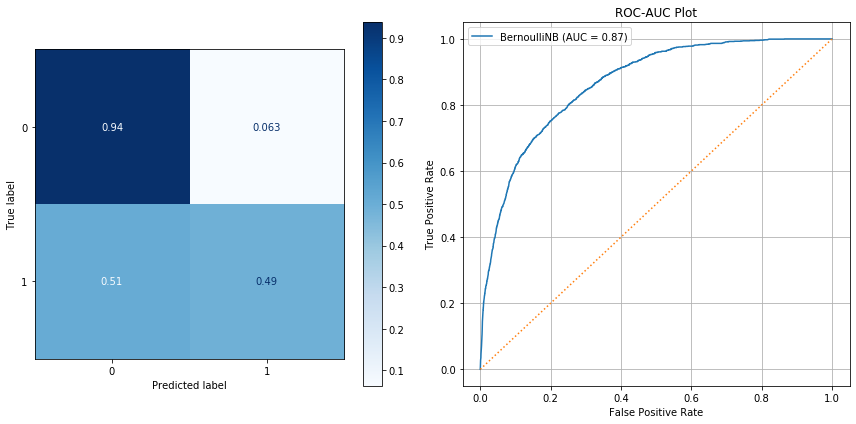

In [65]:
# Set Model
bernoulli = BernoulliNB()

# Fit model
bernoulli.fit(X_train_resampled, y_train_resampled)

# Evaluate
evaluate_model(bernoulli, X_test_df, y_test)

### SGD

In [41]:
from sklearn.linear_model import SGDClassifier

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     33323
           1       0.19      0.78      0.30      1555

    accuracy                           0.84     34878
   macro avg       0.59      0.81      0.61     34878
weighted avg       0.95      0.84      0.88     34878



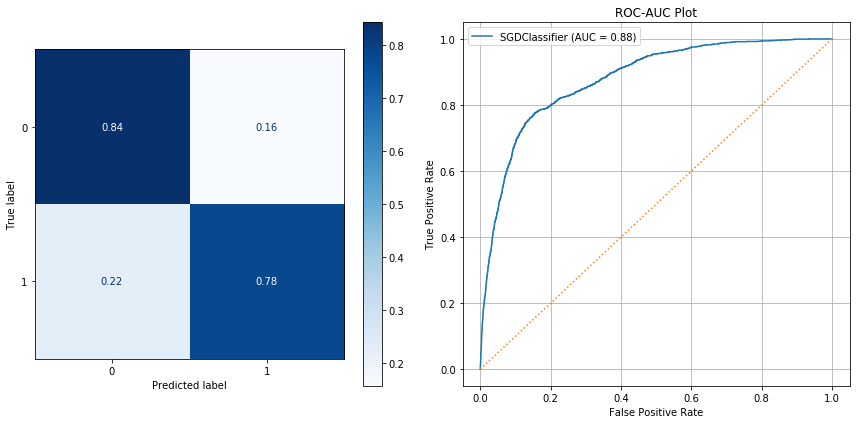

In [42]:
# Set model
sgd = SGDClassifier(class_weight = 'balanced',
                    random_state = 30)

# Fit model
sgd.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(sgd, X_test_df, y_test)

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33323
           1       0.30      0.30      0.30      1555

    accuracy                           0.94     34878
   macro avg       0.63      0.63      0.63     34878
weighted avg       0.94      0.94      0.94     34878



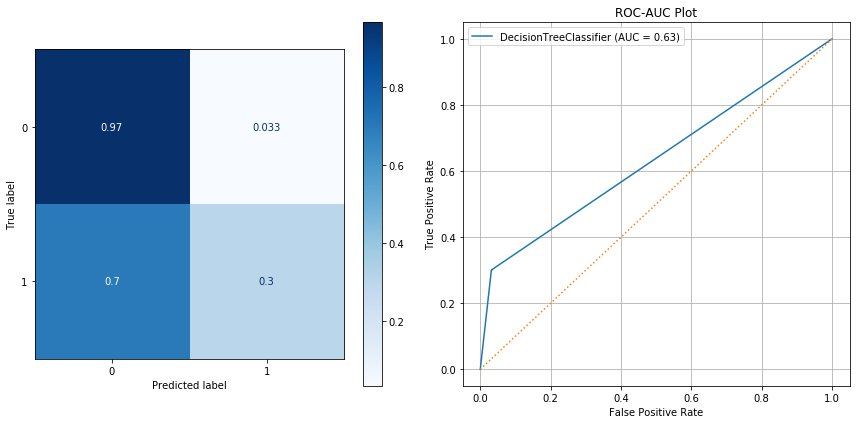

In [105]:
# Set model
tree = DecisionTreeClassifier(class_weight = 'balanced',
                              random_state = 30)

# Fit model
tree.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(tree, X_test_df, y_test)

#### Gridsearch

In [106]:
estimator = DecisionTreeClassifier(class_weight = 'balanced',
                                   random_state = 30)

params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'max_features': [None, 'auto', 'sqrt', 'log2']}

grid = GridSearchCV(estimator = estimator,
                    param_grid = params, 
                    n_jobs = -1, 
                    verbose = 1,
                    cv = 3)

grid.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   37.9s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=30),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=1)

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33323
           1       0.31      0.29      0.30      1555

    accuracy                           0.94     34878
   macro avg       0.64      0.63      0.63     34878
weighted avg       0.94      0.94      0.94     34878



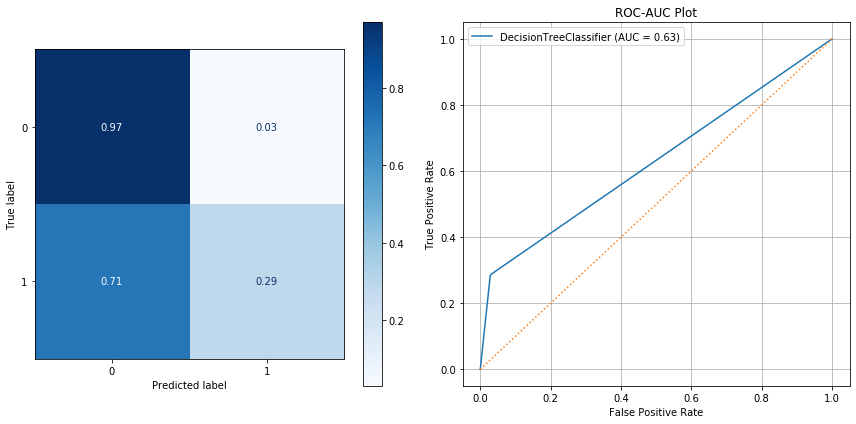

In [107]:
# Fit the model with best parameters
best_tree_params = grid.best_params_
best_tree_model = DecisionTreeClassifier(**best_tree_params,
                                         class_weight = 'balanced',
                                         random_state = 30)
best_tree_model.fit(X_train_df, y_train)

# Evaluate model
evaluate_model(best_tree_model, X_test_df, y_test)

### Support Vector Machines

#### SVC

In [74]:
from sklearn.svm import SVC

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     33323
           1       0.19      0.81      0.31      1555

    accuracy                           0.84     34878
   macro avg       0.59      0.82      0.61     34878
weighted avg       0.95      0.84      0.88     34878



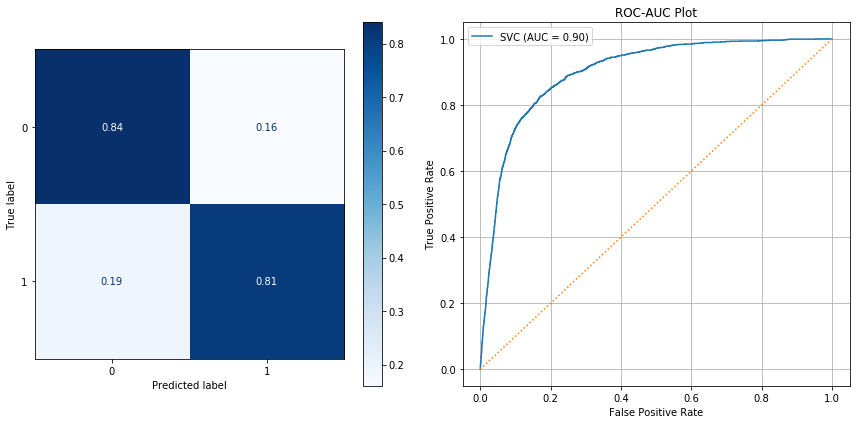

In [76]:
# Set Model
svc = SVC(class_weight = 'balanced')

# Fit model
svc.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(svc, X_test_df, y_test)

#### SVC with Gridsearch

Took forever - 6+ hours. Will revisit later on.  Code is here in the markdown.

```python
# Set Estimator
estimator = SVC(class_weight = 'balanced')

# Set params
params = {'C': [0.1, 1.0],
          'kernel': ['linear', 'rbf'],
          'gamma': ['scale', 'auto'],
          'decision_function_shape': ['ovo', 'ovr']}

grid = GridSearchCV(estimator = estimator,
                    param_grid = params,
                    cv = 3, 
                    scoring = 'recall',
                    verbose = 1,
                    n_jobs = -1)

# fit the thing
grid.fit(X_train_df, y_train)```

### AdaBoost

In [87]:
from sklearn.ensemble import AdaBoostClassifier

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     33323
           1       0.58      0.08      0.15      1555

    accuracy                           0.96     34878
   macro avg       0.77      0.54      0.56     34878
weighted avg       0.94      0.96      0.94     34878



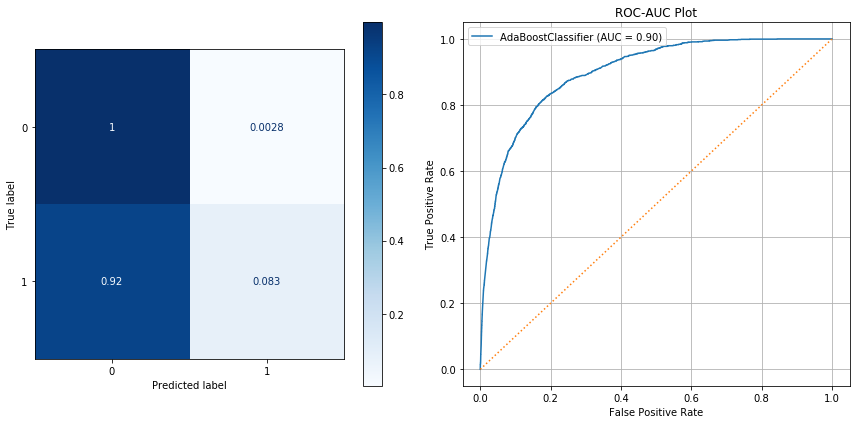

In [89]:
# Set model
ada = AdaBoostClassifier()

# Fit model
ada.fit(X_train_resampled, y_train_resampled)

# Evaluate model
evaluate_model(ada, X_test_df, y_test)

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33323
           1       0.56      0.29      0.38      1555

    accuracy                           0.96     34878
   macro avg       0.76      0.64      0.68     34878
weighted avg       0.95      0.96      0.95     34878



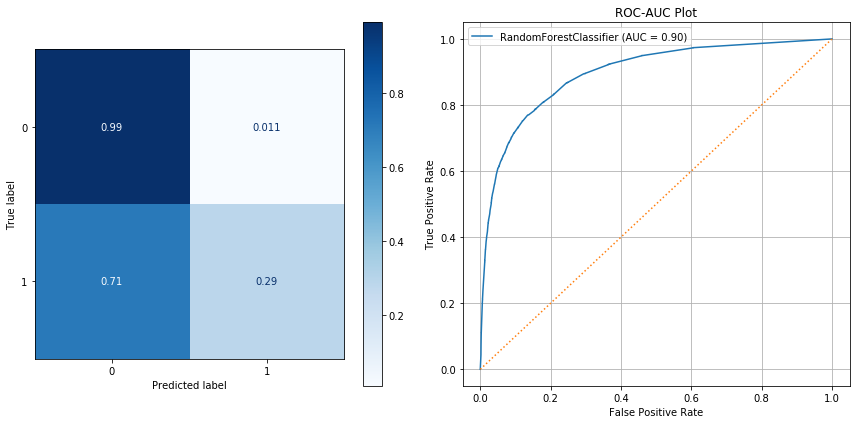

In [110]:
# Set model
rf = RandomForestClassifier(class_weight = 'balanced', 
                            random_state = 30)

# Fit Model
rf.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(rf, X_test_df, y_test)

#### Random Forest with Gridsearch

In [49]:
# Set estimator 
estimator = RandomForestClassifier(class_weight = 'balanced',
                                   random_state = 30)

# Set params 
params = {'n_estimators': [50, 100, 250, 500],
          'criterion': ['gini', 'entropy'],
          'max_features': ['auto','sqrt', 'log2'],
          'max_depth': [None, 10, 100]}

# Create Gridsearch
grid = GridSearchCV(estimator = estimator,
                    param_grid = params,
                    n_jobs = -1, 
                    verbose = 1, 
                    cv = 3)

# Fit gridsearch
grid.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 49.8min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=30),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500]},
             verbose=1)

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     33323
           1       0.63      0.19      0.30      1555

    accuracy                           0.96     34878
   macro avg       0.80      0.59      0.64     34878
weighted avg       0.95      0.96      0.95     34878



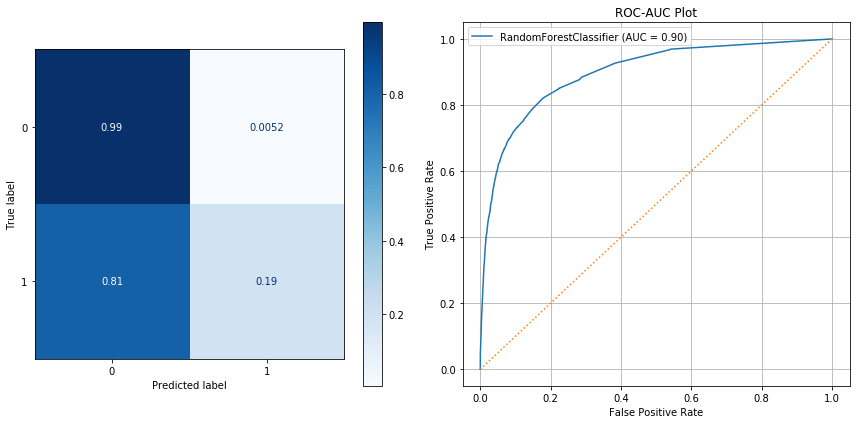

In [50]:
# Fit the model with best parameters
best_rf_params = grid.best_params_
best_rf_model = RandomForestClassifier(**best_rf_params,
                                       class_weight = 'balanced',
                                       random_state = 30)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate model
evaluate_model(best_rf_model, X_test_df, y_test)

### XGBoost

In [51]:
from xgboost import XGBClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     33323
           1       0.70      0.13      0.22      1555

    accuracy                           0.96     34878
   macro avg       0.83      0.57      0.60     34878
weighted avg       0.95      0.96      0.95     34878



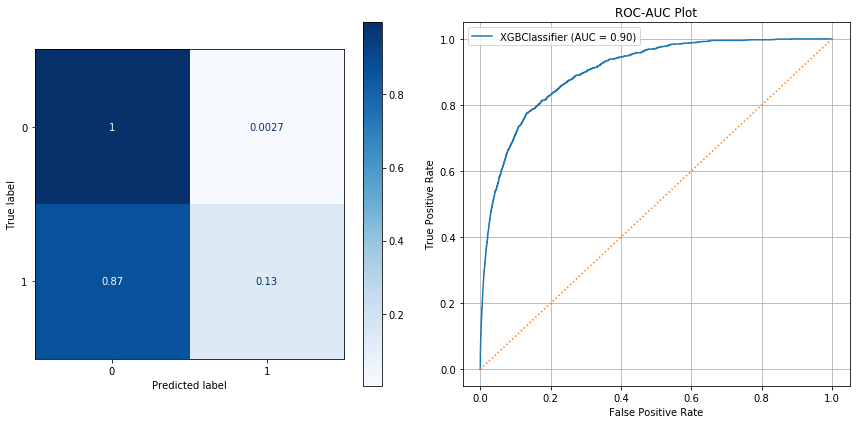

In [52]:
# Set model
xgb = XGBClassifier()

# Fit model
xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
evaluate_model(xgb, X_test_df, y_test)

### Neural Network

In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import Callback, EarlyStopping

#### Super Basic Model

Epoch 1/50
23292/23292 [==============================] - 36s 2ms/step - loss: 7.7210 - accuracy: 0.7455 - val_loss: 1.0789 - val_accuracy: 0.2776
Epoch 2/50
23292/23292 [==============================] - 36s 2ms/step - loss: 0.5157 - accuracy: 0.7824 - val_loss: 0.9001 - val_accuracy: 0.4818
Epoch 3/50
23292/23292 [==============================] - 36s 2ms/step - loss: 0.4713 - accuracy: 0.8183 - val_loss: 0.8787 - val_accuracy: 0.5538
Epoch 4/50
23292/23292 [==============================] - 36s 2ms/step - loss: 0.4551 - accuracy: 0.8251 - val_loss: 0.8261 - val_accuracy: 0.5828
Epoch 5/50
23292/23292 [==============================] - 36s 2ms/step - loss: 0.4453 - accuracy: 0.8278 - val_loss: 0.8381 - val_accuracy: 0.5844
Epoch 6/50
23292/23292 [==============================] - 36s 2ms/step - loss: 0.4379 - accuracy: 0.8305 - val_loss: 0.7918 - val_accuracy: 0.6148
Epoch 7/50
23292/23292 [==============================] - 36s 2ms/step - loss: 0.4308 - accuracy: 0.8334 - val_loss: 0

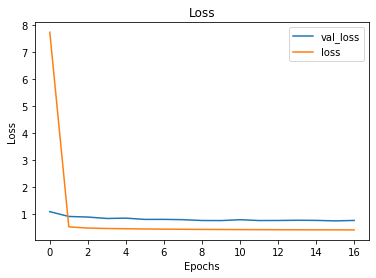

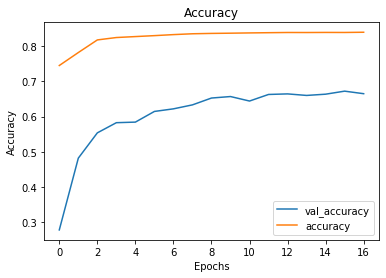

 
                 Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     33323
           1       0.26      0.65      0.37      1555

    accuracy                           0.90     34878
   macro avg       0.62      0.78      0.66     34878
weighted avg       0.95      0.90      0.92     34878

 
                 Confusion Matrix
-------------------------------------------------------


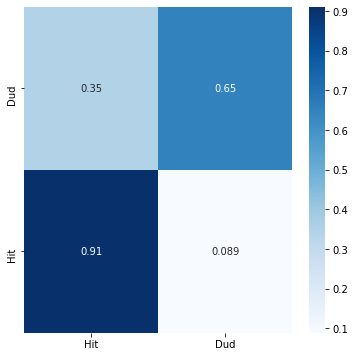

In [144]:
# Set Callback
callback = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'max',
                         min_delta = 0.01, restore_best_weights = True)

# Set model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim = X_train_df.shape[1], activation = 'tanh',
                kernel_regularizer = tf.keras.regularizers.L1(0.3)))

# Hidden Layers
model.add(Dense(64, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'tanh'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))

# Compile
model.compile(optimizer = 'adagrad', loss = 'binary_crossentropy', metrics = 'accuracy')

# Fit the model
history = model.fit(X_train_resampled, y_train_resampled, batch_size = 8, epochs = 50, 
                    validation_split = 0.3, callbacks = callback)

# Evaluate Model
evaluate_network(history, model, X_test_df, y_test)

## Interpret

For the moment, let's just use our logistic regression model to extract some preliminary feature importances.

### Feature Importances

In [55]:
log.coef_

array([[-0.10566595,  0.15643692, -0.22250906, -0.25222564,  0.22083624,
        -0.83636902, -0.01800518, -0.18836735,  0.48592363, -0.0225327 ,
        -0.29245554, -0.01409265, -0.11919602, -3.94889728, -4.71272017,
        -2.62963729, -1.50145508,  0.21438957,  0.92195757,  0.95973843,
         1.15227388,  2.02151074,  2.96663303,  2.67532021]])

In [56]:
# # Pull feature importances
# features_dict = {'Features': X_train_df.columns,
#                  'Importance': )}

# # Convert to a dataframe
# feature_importance = pd.DataFrame(features_dict, columns = ['Features', 'Importance'])

# print(feature_importance.shape)
# feature_importance.head(10)

SyntaxError: invalid syntax (<ipython-input-56-7f21b782a232>, line 3)

### SHAP

In [ ]:
import shap

In [ ]:
# Setting up SHAP

X_shap = shap.sample(X_train_df, 100)
explainer = shap.LinearExplainer(log, X_train_df)
shap_values = explainer.shap_values(X_shap)

In [ ]:
fig = shap.summary_plot(shap_values, X_shap, plot_type = 'bar')

In [ ]:
shap.summary_plot(shap_values, X_shap)

## Conclusion